In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix, classification_report


import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Activation, Input
from tensorflow.keras.regularizers import l1

In [2]:
tf.random.set_seed(43)

# Load Data

In [3]:
cd '/content/drive/MyDrive/Colab Notebooks/Datasets/'

/content/drive/MyDrive/Colab Notebooks/Datasets


Dataset:

It contains data about credit card transactions that occurred during a period of two days, with 492 frauds out of 284,807 transactions.

All variables in the dataset are numerical. The data has been transformed using PCA transformation(s) due to privacy reasons. The two features that haven't been changed are Time and Amount.

Time contains the seconds elapsed between each transaction and the first transaction in the dataset.

In [4]:
data = pd.read_excel('Fraud_detection.xlsx')

In [5]:
data.shape

(100000, 30)

In [6]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.836500,-0.545419,-0.462979,0.537174,-0.426143,-0.100606,-0.584764,-0.103956,2.268429,-0.365185,...,0.085111,0.410736,0.137625,0.602906,-0.350260,0.464407,-0.070917,-0.030486,0.049882,0
1,-4.289880,-2.576061,-0.092256,1.976405,2.810033,-2.669128,-0.981883,-0.470310,-0.025692,0.099528,...,-0.473240,-0.307295,-2.789549,0.578976,-0.837979,0.372843,0.353451,-1.662202,-0.347171,0
2,1.131318,0.139818,0.586921,1.069291,-0.334908,-0.204938,-0.135526,0.043821,-0.121117,0.182139,...,-0.028126,-0.167062,-0.048054,-0.009912,0.417694,-0.479793,0.024360,0.023878,-0.208963,0
3,-0.866956,1.373947,1.948343,2.686750,-0.366790,0.568632,-0.278349,0.739536,-1.655955,0.708396,...,0.022719,-0.070619,-0.080307,0.000816,0.092167,0.159131,0.157940,-0.014370,-0.253595,0
4,-0.842670,1.401843,0.927235,1.070402,0.843883,0.467333,0.366716,0.616739,-1.586963,0.000041,...,0.036573,-0.182581,-0.226834,-1.029794,-0.118762,-0.228960,-0.024250,0.046547,-0.346230,0


# Exploratory Data Analysis

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      100000 non-null  float64
 1   V2      100000 non-null  float64
 2   V3      100000 non-null  float64
 3   V4      100000 non-null  float64
 4   V5      100000 non-null  float64
 5   V6      100000 non-null  float64
 6   V7      100000 non-null  float64
 7   V8      100000 non-null  float64
 8   V9      100000 non-null  float64
 9   V10     100000 non-null  float64
 10  V11     100000 non-null  float64
 11  V12     100000 non-null  float64
 12  V13     100000 non-null  float64
 13  V14     100000 non-null  float64
 14  V15     100000 non-null  float64
 15  V16     100000 non-null  float64
 16  V17     100000 non-null  float64
 17  V18     100000 non-null  float64
 18  V19     100000 non-null  float64
 19  V20     100000 non-null  float64
 20  V21     100000 non-null  float64
 21  V22     100

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,100000.0,-1.742435e-02,2.030088,-56.407510,-0.925560,0.016146,1.315206,2.420064
V2,100000.0,6.771427e-03,1.717424,-72.715728,-0.598403,0.068723,0.808998,22.057729
V3,100000.0,-2.357708e-02,1.616296,-32.454198,-0.897457,0.176484,1.024347,3.985446
V4,100000.0,1.581376e-02,1.446274,-5.519697,-0.840900,-0.012629,0.755859,16.875344
V5,100000.0,-1.006768e-02,1.415135,-35.182120,-0.692643,-0.056555,0.611949,34.801666
V6,100000.0,-5.392275e-03,1.329246,-26.160506,-0.771316,-0.275410,0.397287,21.550496
V7,100000.0,-1.368077e-02,1.324240,-43.557242,-0.559113,0.039391,0.572916,36.877368
V8,100000.0,3.469451e-03,1.224409,-73.216718,-0.209625,0.021778,0.327048,20.007208
V9,100000.0,-7.572017e-03,1.118308,-13.434066,-0.652317,-0.052724,0.596370,10.392889
V10,100000.0,-1.635024e-02,1.165450,-24.588262,-0.538128,-0.096365,0.449762,15.331742


In [9]:
data['Class'].value_counts(normalize = True)

0    0.99508
1    0.00492
Name: Class, dtype: float64

In [10]:
#Check for missing values
data.isna().sum().sum()

0

# Analysis for Fraud and Normal Transactions

In [11]:
fraud = data[data['Class'] == 1]
normal = data[data['Class'] == 0]

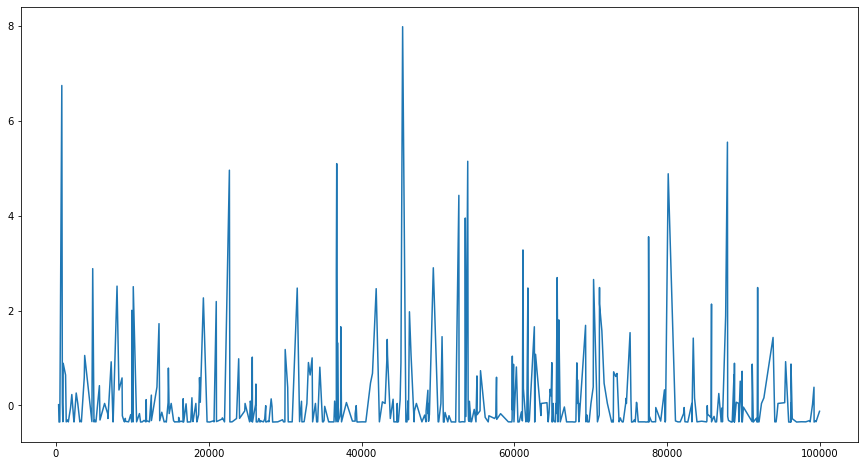

In [12]:
plt.figure(figsize= (15,8))
plt.plot(fraud.Amount)

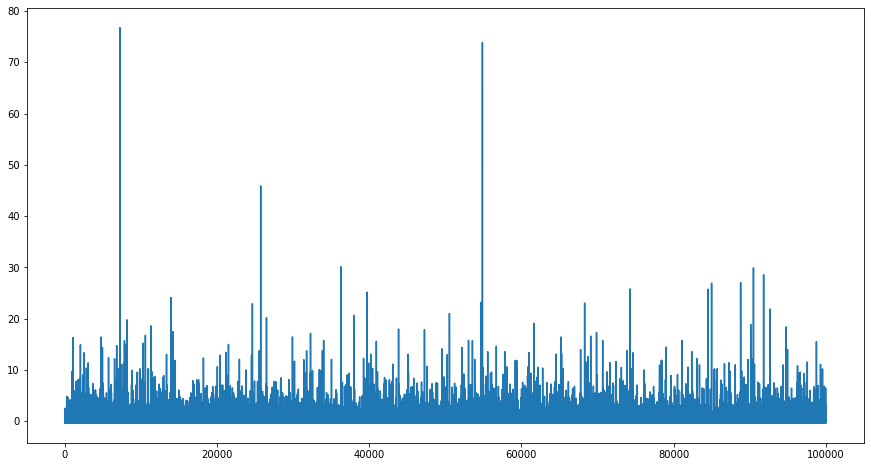

In [13]:
plt.figure(figsize= (15,8))
plt.plot(normal.Amount)

We can see that Fraud transactions are usually for small amounts as opposed to the general idea that fraud transactions could be of higher transaction values.

## Train Test Split

In [14]:
 X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

In [15]:
print(X_train.shape)
print(X_test.shape)

(80000, 30)
(20000, 30)


In [16]:
print(f'Class Distribution of training: \n{X_train["Class"].value_counts(normalize = True)}')
print(f'Class Distribution of test: \n{X_test["Class"].value_counts(normalize = True)}')

Class Distribution of training: 
0    0.994988
1    0.005012
Name: Class, dtype: float64
Class Distribution of test: 
0    0.99545
1    0.00455
Name: Class, dtype: float64


In [17]:
# We are not dropping of target column from train dataset as we would later need it to filter non fraudalent data
y_test = X_test['Class']
X_test = X_test.drop('Class', axis = 1)

In [18]:
#Seperationg out the fraud records from train
X_train_NF = X_train[X_train['Class'] == 0] # non-fraud
X_train_NF = X_train_NF.drop(['Class'], axis=1)

X_train_NF = X_train_NF.values

We train the autoencoder on normal transactions and test it on mixed data as test data.

The model which is trained on normal transactions will generate high reconstruction errors on fraud transactions passed on test data

# Model Building

In [21]:
input = X_train_NF.shape[1]
encoding_dim = 14

In [24]:
input_layer = Input(shape=(input, ))

encoder = Dense(encoding_dim, activation= 'relu')(input_layer)
encoder = Dropout(0.1)(encoder)

encoder = Dense(encoding_dim / 2, activation= 'relu')(encoder)

decoder = Dense(encoding_dim, activation= 'relu')(encoder)
decoder = Dropout(0.1)(decoder)

decoder = Dense(input, activation= 'linear')(decoder)

autoencoder = Model(inputs = input_layer, outputs = decoder)

In [25]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense_4 (Dense)             (None, 14)                420       
                                                                 
 dropout_2 (Dropout)         (None, 14)                0         
                                                                 
 dense_5 (Dense)             (None, 7)                 105       
                                                                 
 dense_6 (Dense)             (None, 14)                112       
                                                                 
 dropout_3 (Dropout)         (None, 14)                0         
                                                                 
 dense_7 (Dense)             (None, 29)                435   

In [26]:
#Compile and train the model
autoencoder.compile(optimizer= 'Adam', loss= 'mean_squared_error', metrics= ['mse'])

In [27]:
fd = autoencoder.fit(X_train_NF, X_train_NF,
                     epochs = 100,
                     batch_size = 128,
                     validation_split = 0.3,
                     verbose = 1)

Epoch 1/100
436/436 [==============================] - 5s 4ms/step - loss: 0.9223 - mse: 0.9223 - val_loss: 0.7266 - val_mse: 0.7266
Epoch 2/100
436/436 [==============================] - 2s 4ms/step - loss: 0.7136 - mse: 0.7136 - val_loss: 0.5975 - val_mse: 0.5975
Epoch 3/100
436/436 [==============================] - 2s 3ms/step - loss: 0.6375 - mse: 0.6375 - val_loss: 0.5436 - val_mse: 0.5436
Epoch 4/100
436/436 [==============================] - 2s 4ms/step - loss: 0.6029 - mse: 0.6029 - val_loss: 0.5043 - val_mse: 0.5043
Epoch 5/100
436/436 [==============================] - 2s 4ms/step - loss: 0.5740 - mse: 0.5740 - val_loss: 0.4822 - val_mse: 0.4822
Epoch 6/100
436/436 [==============================] - 2s 3ms/step - loss: 0.5577 - mse: 0.5577 - val_loss: 0.4549 - val_mse: 0.4549
Epoch 7/100
436/436 [==============================] - 2s 4ms/step - loss: 0.5463 - mse: 0.5463 - val_loss: 0.4497 - val_mse: 0.4497
Epoch 8/100
436/436 [==============================] - 2s 3ms/step - 

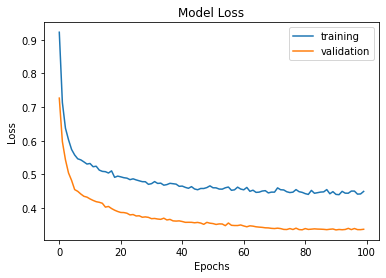

In [29]:
plt.plot(fd.history['loss'])
plt.plot(fd.history['val_loss'])

plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['training','validation'])

In [31]:
#obtaining predictions
pred = autoencoder.predict(X_test.values)

In [34]:
print(f'Shape of Input Test: {X_test.shape}')
print(f'Shape of Predictions: {pred.shape}')

Shape of Input Test: (20000, 29)
Shape of Predictions: (20000, 29)


In [40]:
test_errors = np.mean(np.square(np.abs(X_test - pred)), axis = 1)

test_errors[0:5]

75721    0.180664
80184    0.147673
19864    0.156664
76699    0.226945
92991    0.166203
dtype: float64

In [42]:
mse = np.mean(np.power(X_test - pred, 2), axis=1)
mse[:5]

75721    0.180664
80184    0.147673
19864    0.156664
76699    0.226945
92991    0.166203
dtype: float64

In [45]:
error_df = pd.DataFrame({'reconstruction_error':mse,
                         'true_class': y_test})

In [46]:
error_df.head(10)

,reconstruction_error,true_class
75721,0.180664,0
80184,0.147673,0
19864,0.156664,0
76699,0.226945,0
92991,0.166203,0
76434,0.073668,0
84004,0.311832,0
80917,0.182904,0
60767,0.395329,0
50074,0.444481,0


We now need to define a threshold value which can be used to predict fraud records

We'll take threshold value as the reconstruction error from train data

In [48]:
train_pred = autoencoder.predict(X_train_NF)
mean_train_error = np.mean(np.square(np.abs(X_train_NF - train_pred)),axis = 1).mean()
print(mean_train_error)

0.3345090674941814


In [50]:
scores_f1 = []
thres = []

th = 0
for i in range(200):
    th+=0.1
    fraud = list((test_errors > mean_train_error+th))
    scores_f1.append(f1_score(y_test,fraud))
    thres.append(th+mean_train_error)

In [51]:
np.unique(fraud)

array([False,  True])

Text(0, 0.5, 'F1 Score')

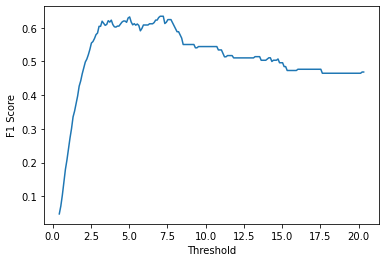

In [53]:
plt.plot(thres, scores_f1)
plt.xlabel('Threshold')
plt.ylabel('F1 Score')

In [57]:
threshold = thres[np.array(scores_f1).argmax()]
print(threshold)

7.034509067494174


In [60]:
fraud1 = test_errors > threshold
fraud1[:5]

75721    False
80184    False
19864    False
76699    False
92991    False
dtype: bool

In [61]:
print(classification_report(y_test, fraud1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19909
           1       0.71      0.57      0.63        91

    accuracy                           1.00     20000
   macro avg       0.86      0.79      0.82     20000
weighted avg       1.00      1.00      1.00     20000



In [62]:
print(f1_score(y_test, fraud1))

0.6341463414634146
